In [ ]:
# To make sure working directory
# Otherwise uncomment and run to include the current directory
import os
os.getcwd()

### Dependencies

In [45]:
from bs4 import BeautifulSoup as bs
import datetime as dt
import json
import nltk
import numpy as np
import pandas as pd
import pickle
import pprint
import re
import requests
import statsmodels.api as sm
import yfinance as yf
from sqlalchemy import create_engine
import psycopg2
from config import db_password

import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis (EDA)

In [27]:
def get_data(filename):
    df = pd.read_csv(filename, parse_dates=True)
    df['date'] = pd.to_datetime(df.date)
    df = df.sort_values(['date', 'ticker'])
    date1 = input("Enter start date(YYYY-MM-DD):")
    date2 = input("Enter start date(YYYY-MM-DD):")
    date1 = dt.datetime.strptime(date1, "%Y-%m-%d") 
    date2 = dt.datetime.strptime(date2, "%Y-%m-%d") 
    df = df.loc[(df['date'] >= date1) & (df['date'] <= date2)]
    df = df.sort_values(['date', 'ticker'])
    return df

In [55]:
# def get_data(symbols, dates):
#     df = pd.DataFrame(index = dates)
#     if "AAPL" not in symbols:
#         symbols.insert(0, "AAPL")
#         for symbol in symbols:
#             df_temp = pd.read_csv("{}_SP.csv".format(symbol), index_col="Date", parse_dates = True, 
#                          usecols = ["Date", "Close"], na_values = "nan")
#             df_temp = df_temp.rename(columns = {"Close": symbol})
#             df = df.join(df_temp)
#             #if symbol == "AAPL":
#                 #df = df.dropna(["AAPL"])
#     return df

In [56]:
# def get_data(symbols, dates):
#     df = pd.DataFrame(index = dates)
#     df_AAPL = pd.read_csv("AAPL_SP.csv", index_col="Date", parse_dates = True, 
#                          usecols = ["Date", "Close"], na_values = "nan")
#     df_AAPL = df_AAPL.rename(columns = {"Close": "AAPL"})
#     df = df.join(df_AAPL, how = "inner")
    
#     symbols = ["AMZN", "NFLX", "META", "TSLA", "GOOG"]
#     for symbol in symbols:
#         df_temp = pd.read_csv("{}_SP.csv".format(symbol), index_col="Date", parse_dates = True, 
#                          usecols = ["Date", "Close"], na_values = "nan")
#         df_temp = df_temp.rename(columns = {"Close": symbol})
#         df = df.join(df_temp)
#     return(df)

In [57]:
# symbols = ["AMZN", "NFLX", "META", "TSLA", "GOOG"]
# dates = pd.date_range("2018-01-02", "2019-12-31")
# df = get_data(symbols, dates)

In [31]:
df = get_data('stocks_10companies_5_sectors.csv')

Enter start date(YYYY-MM-DD):2020-01-01
Enter start date(YYYY-MM-DD):2022-07-15


In [32]:
df

,ticker,date,code,open,high,low,close,adjclose,volume,gics_sector
6390,AAP,2020-01-02,AAP_2020-01-02,160.470001,160.949997,157.529999,159.410004,153.283569,944900.0,Consumer Discretionary
19170,AAPL,2020-01-02,AAPL_2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400.0,Information Technology
12780,ABT,2020-01-02,ABT_2020-01-02,86.059998,86.959999,85.800003,86.949997,83.297440,4969000.0,Health Care
19809,AMAT,2020-01-02,AMAT_2020-01-02,62.000000,62.650002,61.700001,62.200001,60.680820,6647900.0,Information Technology
20448,AMD,2020-01-02,AMD_2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100.0,Information Technology
...,...,...,...,...,...,...,...,...,...,...
25559,SWKS,2022-07-15,SWKS_2022-07-15,100.000000,101.180000,98.739998,101.059998,101.059998,1666800.0,Information Technology
12779,TSLA,2022-07-15,TSLA_2022-07-15,720.000000,730.869995,710.669983,720.200012,720.200012,23165500.0,Consumer Discretionary
19169,UNH,2022-07-15,UNH_2022-07-15,526.059998,531.989990,515.450012,529.750000,529.750000,5741800.0,Health Care
31949,WELL,2022-07-15,WELL_2022-07-15,81.190002,81.480003,80.209999,81.220001,81.220001,2078600.0,Real Estate


In [33]:
def create_dataframe(data):
    dfs = dict(tuple(data.groupby('ticker')))
    df_f = {}
    for df in dfs:
        dfs[df].set_index('date', inplace = True)
        df_f[df] = dfs[df].adjclose
    df_f = pd.DataFrame(df_f)
    return df_f
    df_f

In [35]:
df1 = create_dataframe(df)

In [36]:
df1

,AAP,AAPL,ABT,AMAT,AMD,AMGN,AMT,AMZN,AVB,BIIB,...,PSA,PYPL,SBUX,SPG,STZ,SWKS,TSLA,UNH,WELL,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,153.283569,73.785904,83.297440,60.680820,49.099998,222.913177,217.444458,94.900497,190.337555,294.239990,...,195.609177,110.750000,85.087051,126.021042,181.498627,117.296616,86.052002,281.931519,73.047607,114.296684
2020-01-03,153.293182,73.068565,82.281967,59.715004,48.599998,221.399857,217.549149,93.748497,192.165237,290.850006,...,197.718674,108.760002,84.591858,126.246880,182.684189,114.385162,88.601997,279.078461,74.332832,113.287689
2020-01-06,150.773880,73.650803,82.713074,58.427242,48.389999,223.098831,217.492020,95.143997,192.486649,290.820007,...,198.421829,110.169998,83.925255,126.906967,183.522766,112.370293,90.307999,281.015808,75.463081,113.057053
2020-01-07,148.985367,73.304428,82.253235,60.114990,48.250000,221.000626,212.857666,95.343002,188.298599,290.089996,...,197.635391,109.669998,83.668152,125.465141,176.968384,113.440392,93.811996,279.319366,74.970863,112.009598
2020-01-08,147.273773,74.483604,82.588531,60.075970,47.830002,221.167755,214.703827,94.598503,189.079254,292.660004,...,197.996262,111.820000,84.639473,126.290283,183.416733,115.243179,98.428001,285.208679,74.989113,111.625221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,181.750000,144.869995,108.408142,88.620003,76.949997,247.779999,257.989990,111.750000,190.550003,215.259995,...,313.799988,70.470001,77.900002,97.220001,241.139999,95.419998,703.030029,516.950012,82.110001,125.449997
2022-07-12,183.839996,145.860001,107.820755,88.730003,76.360001,246.970001,255.490005,109.220001,191.339996,215.580002,...,307.369995,71.430000,77.760002,97.599998,240.559998,96.510002,699.210022,514.419983,82.440002,125.070000
2022-07-13,185.339996,145.490005,105.740005,89.080002,77.519997,247.089996,255.919998,110.400002,190.550003,214.529999,...,306.079987,71.360001,77.919998,95.559998,244.979996,97.879997,711.119995,501.239990,81.910004,125.370003


### Look for some plots

<AxesSubplot:xlabel='date'>

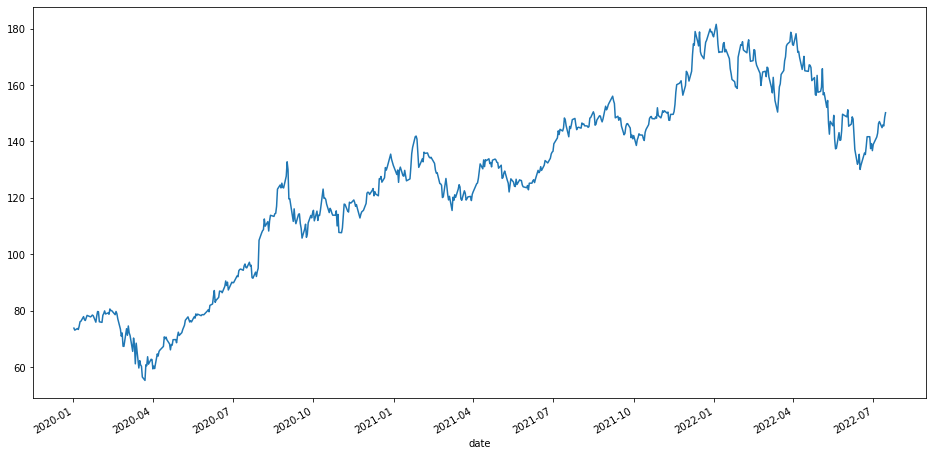

In [41]:
df1['AAPL'].plot(figsize = (16, 8))

In [50]:
def get_summary_close(symbol):
    close_min = df['close'].min()
    close_max = df['close'].max()
    close_mean = df['close'].mean()
    close_std = df['close'].std()
    return print(symbol, close_min, close_max, close_min, close_mean, close_std)

In [59]:
def normalize_data(df):
    return(df/df.iloc[0, :])

In [46]:
def plot_data(df, title = "S&P 500 Stock Data between 2018-01-02 and 2019-12-31"):
    ax = df.plot(title=title, fontsize = 2, figsize = (16, 8))
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price")
    plt.show()

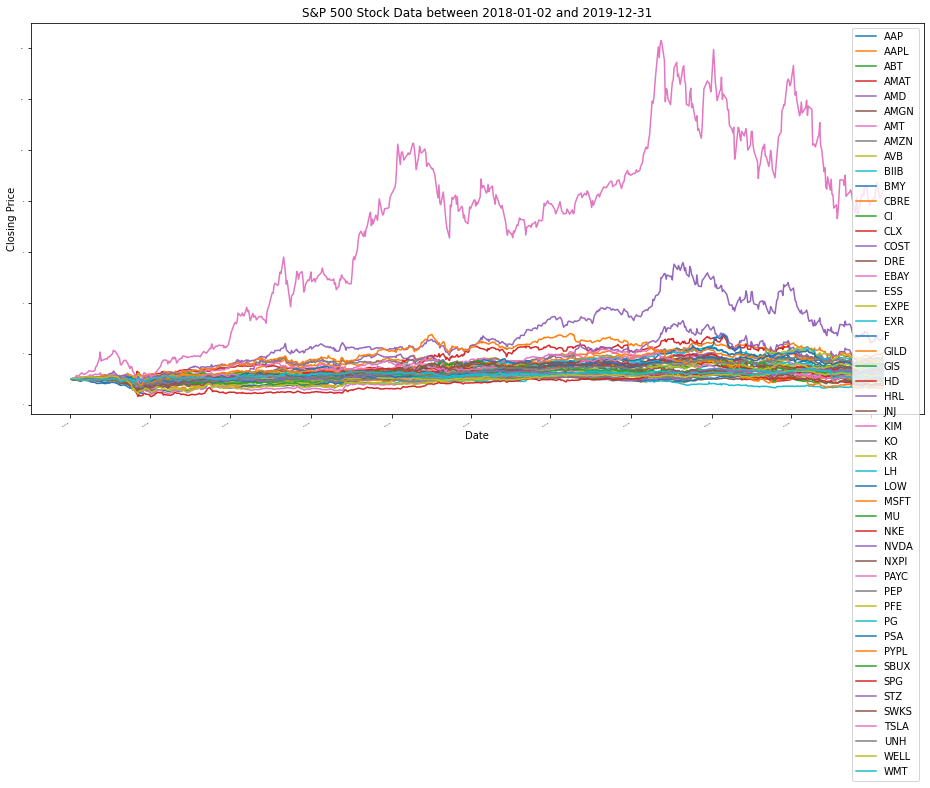

In [61]:
plot_data(normalize_data(df1))

In [62]:
df2 = normalize_data(df1)

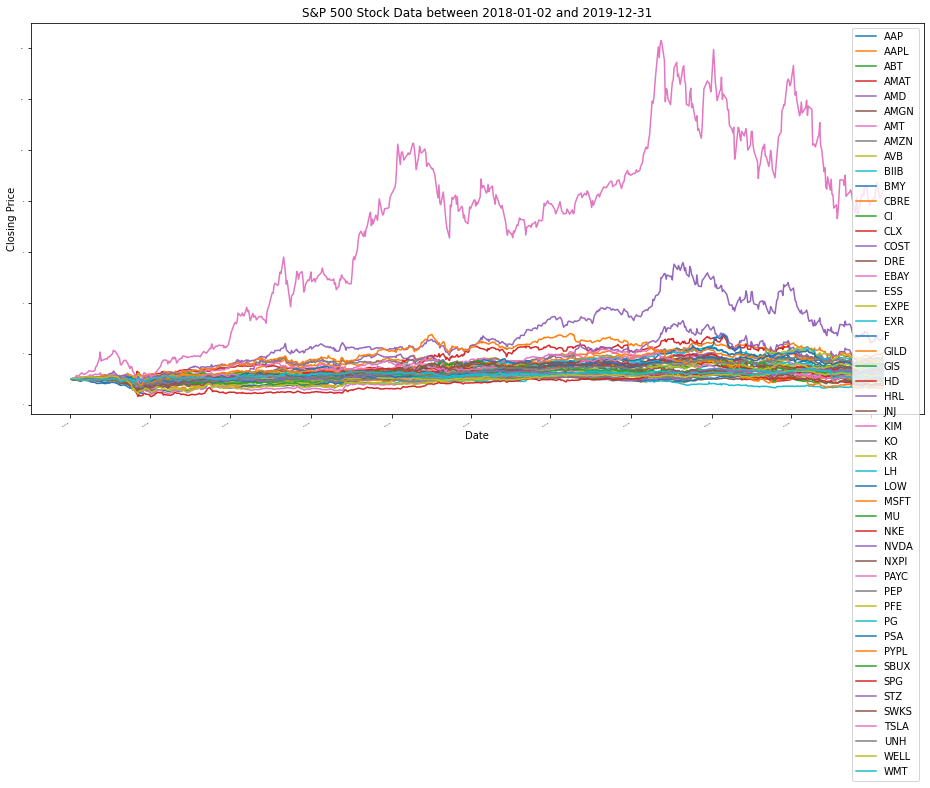

In [64]:
plot_data(df2)

In [ ]:
def get_bollinger_bands(rm, rstd):
    upper_band = rm + 2* rstd
    lower_band = rm - 2* rstd
    return upper_band, lower_band

In [53]:
def test_run2(st, ed):
    dates = pd.date_range(st, ed)
    symbols = ["AAPL"]
    df = get_data(symbols, dates)
    #print(df)
    ax = df["AAPL"].plot(figsize = (16, 8), title="AAPL Roling Mean, Lower and Upper Bounds", label = "AAPL")
    #rmAAPL = df["AAPL"].rolling(window = 20).mean()
    rmAAPL = get_rolling_means(df["AAPL"], 20)
    #print(rmAAPL)
    rmAAPL.plot(label = "Rolling mean", ax = ax)
    #rstdAAPL = df["AAPL"].rolling(window = 20).std()
    rstdAAPL = get_rolling_stds(df["AAPL"], 20)
    upper_band, lower_band = get_bollinger_bands(rmAAPL, rstdAAPL)
    #plot_data(df["AAPL"])
    upper_band.plot(label = "Upper Band", ax = ax)
    lower_band.plot(label = "Lower Band", ax = ax)
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price")
    ax.legend(loc = "upper left")
    plt.show()

In [54]:
test_run2("2018-01-02", "2019-12-31")

TypeError: get_data() takes 1 positional argument but 2 were given